In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.width', 500)

In [2]:
def show_distribution(values, one_width_bins=False):
    values = np.array(values)
    if one_width_bins:  bins = range(min(values), max(values) + 1, 1)
    else:               bins = 25
    print("\nSTATS:")
    print("max: {:_}".format(max(values)))
    print("mean: {:.2f}".format(np.mean(values)))
    fig, ax = plt.subplots(ncols=2, figsize=(10,4))
    ax[0].hist(values, bins=bins)
    ax[0].set_title('Histogram of amount of mentions per tweet')
    ax[1].hist(values, log=True, bins=bins)
    ax[1].set_title('Logarithmic Histogram of amount of mentions per tweet')
    plt.show()

In [3]:
# COLUMNS:
# Lines (tweets): 8_151_524
dataset_fn = "dataset/TweetsCOV19.tsv"
header = ["Tweet Id", "Username", "Timestamp", "Followers", "Friends", "Retweets", "Favorites", "Entities", "Sentiment", "Mentions", "Hashtags", "URLs", "EXTRA"]
dtype = {"Tweet Id":int, "Username":"string", "Timestamp":"string", "Followers":int, "Friends":int, "Retweets":int, "Favorites":int, "Entities":"string", "Sentiment":"string", "Mentions":"string", "Hashtags":"string", "URLs":"string", "EXTRA":"string"}

In [4]:
df = pd.read_csv(dataset_fn, sep='\t', names=header, on_bad_lines='warn', dtype=dtype)
# on_bad_lines='warn'
print(df.shape)
print(df.head())

(8077794, 13)
     Tweet Id                          Username                       Timestamp  Followers  Friends  Retweets  Favorites                                           Entities Sentiment Mentions Hashtags                                               URLs EXTRA
0 -1755922431  35234fe4a19cc1a3336095fb3780bcc1  Mon Sep 30 22:00:37 +0000 2019        619      770         0          0                                              null;      2 -1    null;    null;                                              null;  <NA>
1 -1605079040  ea4592f39636d87af8fb4b17b7e2e4c0  Mon Sep 30 22:01:24 +0000 2019      36365    19344        13         17  nazi:Nazism:-2.742538749414189;blood money:Blo...      1 -4    null;    null;  https://twitter.com/himalayahawk/status/117766...  <NA>
2 -2028564480  bf05d1888dd974fa4a8679c25e2ead03  Mon Sep 30 22:06:21 +0000 2019       5018     1933         0          0  vaccine:Vaccine:-2.6651530673745762;anti vaxxe...      2 -1    null;    null;                

In [32]:
dff2 = df.copy()
#dff2['Timestamp_col'] = pd.to_datetime(dff2['Timestamp'], format='%a %b %d %H:%M:%S %Z %Y')
dff2['Timestamp_col'] = pd.to_datetime(dff2['Timestamp'])
print(dff2.head())

C:\Users\stirl\AppData\Local\Temp\ipykernel_13004\1051261403.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dff2['Timestamp_col'] = pd.to_datetime(dff2['Timestamp'])


           Tweet Id                          Username                       Timestamp                       Mentions                              Hashtags  Sentiment_pos  Sentiment_neg             Timestamp_col
1779038    68444160  07e378b2566f2701482c0014f9d759be  Wed Jan 01 00:04:26 +0000 2020                     [JoeBiden]                    [GOODBYEDEMOCRATS]              2             -1 2020-01-01 00:04:26+00:00
1779042  2102890496  77ba7b7600b41faeeec12b9624305a4f  Wed Jan 01 00:11:32 +0000 2020                             []  [DontDrinkAndDrive, BeHappy, BeSafe]              2             -1 2020-01-01 00:11:32+00:00
1779045 -2070433791  bb6480fff41c09ab9089bf0d4920024c  Wed Jan 01 00:26:53 +0000 2020  [BetoORourke, AHouseElPaso!!]       [HappyNewYearsEve, BetoForever]              2             -2 2020-01-01 00:26:53+00:00
1779051   118984704  5fd92be8ab0eaa2f77b0ef98d4af361f  Wed Jan 01 00:39:34 +0000 2020                             []         [Trump2020, TakeBackTheHouse]  

In [15]:
# filter dataframe for tweets between Jan 2020 - Mar 2020
dff = df[df['Timestamp'].str.endswith("2020") & (df['Timestamp'].str.contains('Jan') | df['Timestamp'].str.contains('Feb')| df['Timestamp'].str.contains('Mar'))]
dff = dff[['Tweet Id', 'Username', 'Timestamp', 'Sentiment', 'Mentions', 'Hashtags']]
print(dff.shape)

(3838516, 6)


In [16]:
# Split mentions tab into array
dff['Mentions'] = dff['Mentions'].str.split().apply(lambda x: [name for name in x if name != "null;"] if isinstance(x, list) else [])

In [17]:
# Split hashtags tab into array
dff['Hashtags'] = dff['Hashtags'].str.split().apply(lambda x: [name for name in x if name != "null;"] if isinstance(x, list) else [])

In [19]:
# Split positive and negative sentiments into own columns (and convert to int type)
dff[['Sentiment_pos', 'Sentiment_neg']] = dff['Sentiment'].str.split(" ", expand=True)
dff['Sentiment_pos'], dff['Sentiment_neg'] = dff['Sentiment_pos'].astype(int), dff['Sentiment_neg'].astype(int)
dff.drop("Sentiment", axis=1, inplace=True)

In [20]:
print(dff.head(5))

           Tweet Id                          Username                       Timestamp                                           Mentions            Hashtags  Sentiment_pos  Sentiment_neg
1779036 -2112565248  5a90aeeb8ef8efdb95f0ecd5e9099be6  Wed Jan 01 00:00:51 +0000 2020                                                 []                  []              2             -2
1779037  -904593408  a12a31f3ba8c6a16eeeb5eac1bfa8943  Wed Jan 01 00:02:47 +0000 2020  [Star_Lord_Guy, Coff33Nut, FuckYeahGunz, Tiger...                  []              1             -2
1779038    68444160  07e378b2566f2701482c0014f9d759be  Wed Jan 01 00:04:26 +0000 2020                                         [JoeBiden]  [GOODBYEDEMOCRATS]              2             -1
1779039   223780866  158175826f96eb940edcb0146ecac364  Wed Jan 01 00:04:44 +0000 2020                                         [PaulNCov]                  []              1             -1
1779040 -2116644864  067b938119996c55eb64d1b3827a8bca  Wed Jan 01

Extracting amount of mentions ...
Sorting ...

STATS:
max: 51
mean: 2.53


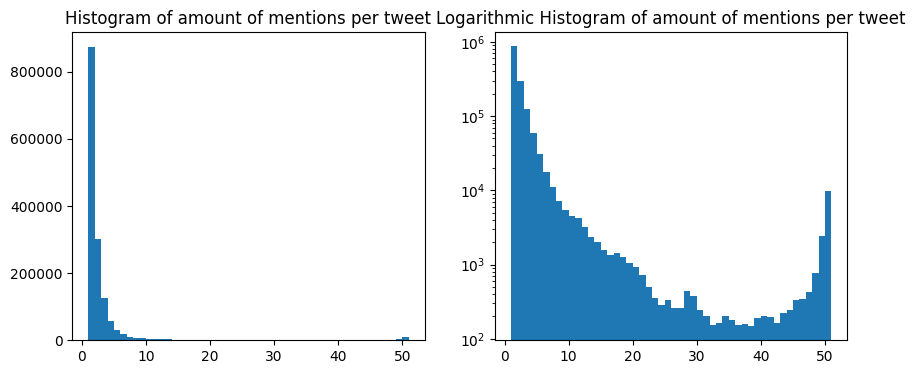

In [24]:
# Filter rows with mentions (and fewer that outlier mentions)
with_mentions = dff[dff['Mentions'].apply(lambda x: len(x) > 0 and len(x) < 60)]
print(with_mentions.shape)

# View distribution of amount of mentions per tweet
print("Extracting amount of mentions ...")
mentions_n = np.array(with_mentions['Mentions'].apply(lambda x: len(set(x))))
print("Sorting ...")
mentions_n = sorted(mentions_n, reverse=True)

show_distribution(mentions_n, one_width_bins=True)

In [27]:
# Filter rows with mentions (and less that outlier mentions)
with_hashtags = dff[dff['Hashtags'].apply(lambda x: len(x) > 0 and len(x) < 60)]
print(with_hashtags.shape)
#sel = dff[dff['Hashtags'].apply(lambda x: len(x) > 40)]
#print(sel)

(1189764, 7)


Extracting amount of hashtags ...
Sorting ...

STATS:
max: 34
mean: 2.38


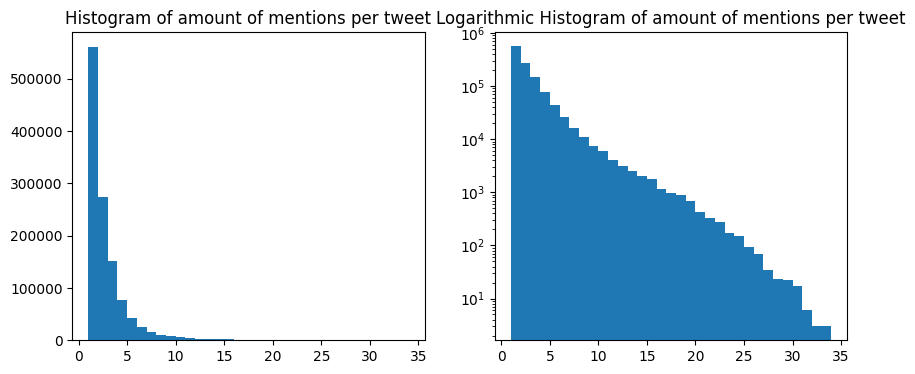

In [29]:
# View distribution of amount of hashtags per tweet
print("Extracting amount of hashtags ...")
hashtags_n = np.array(with_hashtags['Hashtags'].apply(lambda x: len(set(x))))
print("Sorting ...")
hashtags_n = sorted(hashtags_n, reverse=True)

show_distribution(hashtags_n, one_width_bins=True)

In [30]:
#def create_edges_by_shared_mentions(df, array_col="Mentions", id_col="Tweet Id"):
df = with_hashtags
array_col, id_col = "Hashtags", "Tweet Id"
dict = {}
print("Getting list of ids per hashtag ...")
i = 0
for _, row in df.iterrows():
    i += 1
    perc = (i) / len(df) * 100
    print("\r {:_}/{:_} ({:.1f}%)".format(i, len(df), perc), end='')
    for mention in set(row[array_col]):
        dict[mention] = dict.get(mention, []) + [row[id_col]]
print("\nDone.")
print("Found {:_} unique hashtags".format(len(dict)))

Getting list of ids per hashtag ...
 1_189_764/1_189_764 (100.0%)
Done.
Found 493_230 unique hashtags


In [33]:
# Filter mentions with more than 1 associated tweet
dictf = { k: v for k, v in dict.items() if len(v) > 1 }
print("Found {:_} hashtags with more than 1 associated tweet".format(len(dictf)))

Found 138_289 hashtags with more than 1 associated tweet


In [ ]:
# View most common mentions
keys_sorted = sorted(dict.keys(), reverse=True, key=lambda key: len(dict[key]))
for i in range(20):
    key = keys_sorted[i]
    print("key: '{}' number of tweets: {:_}".format(key, len(dict[key])))

In [ ]:
from math import comb
print("{:_}".format(comb(64_146,2)))
print("{:_}".format(comb(12_753,2)))

In [ ]:
edges_n = sum([ comb(len(v),2) for v in dictf.values() ])
print("{:_}".format(edges_n))

In [34]:
# Create edges from term : array pairs in dictf
print("Creating edges ...")
edges_fn = "data/edges.txt"
with open(edges_fn, 'w') as f:
    edges_created = 0
    for done, (_, ids) in enumerate(dictf.items()):
        perc = (done+1) / len(dictf) * 100
        print("\r {:_}/{:_} ({:.3f}%) edges: {:_}".format(done+1, len(dictf), perc, edges_created), end='')
        for i in range(len(ids)):
            for j in range(i+1, len(ids)):
                line = "{} {}\n".format(ids[i], ids[j])
                f.write(line)
                edges_created += 1
        if perc >= 0.1: break
print("\nDone!")

Creating edges ...
 139/138_289 (0.101%) edges: 120_426_706
Done!


In [ ]:
import time
for i in range(5):
    print("\rtesting {}".format(i), end='')
    time.sleep(0.5)
print()


In [ ]:
a = set()
a.add(frozenset((2,1)))
#a.add(frozenset((1,2)))
a.add(frozenset((1,3)))
print(a)

In [ ]:
# Create test dataframe
import random
df2 = pd.DataFrame()
n = 5
df2['id'] = [int(random.random()*10000) for _ in range(n)]
df2['Mentions'] = [ ['a'], ['b', 'c'], ['a', 'c'], ['b', 'd'], ['e', 'd', 'a'] ]
#print(df2)
mentions_n = df2['Mentions'].apply(lambda x: len(x))
mentions_n = np.array(mentions_n)
#mentions_n = np.log(mentions_n)
print(type(mentions_n))
print(mentions_n)

# GET DICT
df = df2
array_col, id_col = "Mentions", "id"
dict = {}
print("Getting list of ids per mention ...")
i = 0
for _, row in df.iterrows():
    i += 1
    perc = (i) / len(df) * 100
    print("\r {:_}/{:_} ({:.1f}%)".format(i, len(df), perc), end='')
    for mention in set(row[array_col]):
        dict[mention] = dict.get(mention, []) + [row[id_col]]
print("\nDone.")
print("Found {:_} unique mentions".format(len(dict)))

# CREATE AND SAVE EDGES
print("Creating edges ...")
edges_fn = "data/edges.txt"
with open(edges_fn, 'w') as f:
    
    edges = set()
    for _, ids in dict.items():
        for i in range(len(ids)):
            for j in range(i+1, len(ids)):
                edge = tuple(sorted((ids[i], ids[j])))
                edges.add(edge)
print("\nDone!")

In [ ]:
# Get expected number of edges
def get_number_of_edges(df, col):
    from math import comb
    dict = {}
    print("iterating rows ...")
    scanned, total = 0, df.shape[0]
    for _, row in df.iterrows():
        scanned += 1
        perc = round(scanned / total * 100, 1)
        print("\r {}/{} ({}%)".format(scanned, total, perc), end='')
        for item in set(row[col]):
            dict[item] = dict.get(item, 0) + 1
        #if perc >= 5: break
    print("\nDone.")
    n = sum([ comb(v,2) for v in dict.values() ])
    return n

number_of_edges = get_number_of_edges(with_hashtags, 'Hashtags')
print(f'Expected number of edges: {number_of_edges:_}')